# Genetic Algorithm MLP

In [5]:
import numpy as np
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Filtering the data
x_train = x_train[np.isin(y_train, [0, 1])]
y_train = y_train[np.isin(y_train, [0, 1])]

x_test = x_test[np.isin(y_test, [0, 1])]
y_test = y_test[np.isin(y_test, [0, 1])]

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=200, alpha=0.0001,
                    solver='adam', verbose=10, random_state=42,
                    learning_rate_init=0.001)

mlp.fit(x_train.reshape(x_train.shape[0], -1), y_train)

y_pred = mlp.predict(x_test.reshape(x_test.shape[0], -1))
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Iteration 1, loss = 1.00900388
Iteration 2, loss = 0.04854938
Iteration 3, loss = 0.03190374
Iteration 4, loss = 0.01523782
Iteration 5, loss = 0.01692994
Iteration 6, loss = 0.01273864
Iteration 7, loss = 0.00255270
Iteration 8, loss = 0.01097874
Iteration 9, loss = 0.00137430
Iteration 10, loss = 0.00001528
Iteration 11, loss = 0.00001449
Iteration 12, loss = 0.00001446
Iteration 13, loss = 0.00001444
Iteration 14, loss = 0.00001443
Iteration 15, loss = 0.00001442
Iteration 16, loss = 0.00001441
Iteration 17, loss = 0.00001440
Iteration 18, loss = 0.00001440
Iteration 19, loss = 0.00001439
Iteration 20, loss = 0.00001439
Iteration 21, loss = 0.00001438
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Accuracy: 0.9981


In [ ]:
# Define the fitness function for MLP
def fitness_function_mlp(num_neurons):
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=200, alpha=0.0001,
                        solver='adam', random_state=42, learning_rate_init=0.001)
    mlp.fit(x_train.reshape(x_train.shape[0], -1), y_train)
    y_pred = mlp.predict(x_test.reshape(x_test.shape[0], -1))
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Genetic Algorithm for optimizing the number of neurons
def genetic_algorithm_mlp(pop_size, generations, mutation_rate):
    # Initialize population with random number of neurons
    population = [random.randint(10, 100) for _ in range(pop_size)]
    for generation in range(generations):
        fitnesses = [fitness_function_mlp(num_neurons) for num_neurons in population]
        parents = select_parents(population, fitnesses)
        next_population = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover([parent1], [parent2])
            mutate(child1, mutation_rate)
            mutate(child2, mutation_rate)
            next_population.extend([child1[0], child2[0]])
        population = next_population
    best_num_neurons = max(population, key=fitness_function_mlp)
    return best_num_neurons

# Parameters
pop_size = 10
generations = 20
mutation_rate = 0.01

# Run the genetic algorithm to find the best number of neurons
best_num_neurons = genetic_algorithm_mlp(pop_size, generations, mutation_rate)
print("Best number of neurons:", best_num_neurons)

# Train the final model with the best number of neurons
mlp_best = MLPClassifier(hidden_layer_sizes=(best_num_neurons,), max_iter=200, alpha=0.0001,
                         solver='adam', random_state=42, learning_rate_init=0.001)
mlp_best.fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred_best = mlp_best.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best number of neurons: {accuracy_best:.4f}")

In [7]:
import random

# Define the fitness function for MLP
def fitness_function_mlp(params):
    num_neurons, learning_rate, alpha = params
    mlp = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=200, alpha=alpha,
                        solver='adam', random_state=42, learning_rate_init=learning_rate)
    mlp.fit(x_train.reshape(x_train.shape[0], -1), y_train)
    y_pred = mlp.predict(x_test.reshape(x_test.shape[0], -1))
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize the population with random parameters
def initialize_population(pop_size):
    population = []
    for _ in range(pop_size):
        num_neurons = random.randint(10, 100)
        learning_rate = random.uniform(0.0001, 0.01)
        alpha = random.uniform(0.0001, 0.01)
        population.append((num_neurons, learning_rate, alpha))
    return population

# Select parents based on fitness (roulette wheel selection)
def select_parents(population, fitnesses):
    total_fitness = sum(fitnesses)
    selection_probs = [fitness / total_fitness for fitness in fitnesses]
    parents = random.choices(population, weights=selection_probs, k=len(population))
    return parents

# Perform crossover (single-point crossover)
def crossover(parent1, parent2):
    crossover_point = random.randint(1, len(parent1) - 1)
    child1 = parent1[:crossover_point] + parent2[crossover_point:]
    child2 = parent2[:crossover_point] + parent1[crossover_point:]
    return child1, child2

# Perform mutation (mutate a random parameter)
def mutate(params, mutation_rate):
    num_neurons, learning_rate, alpha = params
    if random.random() < mutation_rate:
        num_neurons = random.randint(10, 100)
    if random.random() < mutation_rate:
        learning_rate = random.uniform(0.0001, 0.01)
    if random.random() < mutation_rate:
        alpha = random.uniform(0.0001, 0.01)
    return (num_neurons, learning_rate, alpha)

# Genetic Algorithm
def genetic_algorithm_mlp(pop_size, generations, mutation_rate):
    population = initialize_population(pop_size)
    for generation in range(generations):
        fitnesses = [fitness_function_mlp(params) for params in population]
        parents = select_parents(population, fitnesses)
        next_population = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.extend([child1, child2])
        population = next_population
    best_params = max(population, key=fitness_function_mlp)
    return best_params

# Parameters
pop_size = 10
generations = 20
mutation_rate = 0.01

# Run the genetic algorithm to find the best parameters
best_params = genetic_algorithm_mlp(pop_size, generations, mutation_rate)
print("Best parameters:", best_params)

# Train the final model with the best parameters
num_neurons, learning_rate, alpha = best_params
mlp_best = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=200, alpha=alpha,
                         solver='adam', random_state=42, learning_rate_init=learning_rate)
mlp_best.fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred_best = mlp_best.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best parameters: {accuracy_best:.4f}")

Best parameters: (45, 0.0021692473057086568, 0.007589679984855969)
Accuracy with best parameters: 0.9991


Best parameters: (58, 0.009656697040232066, 0.005946542024880081)


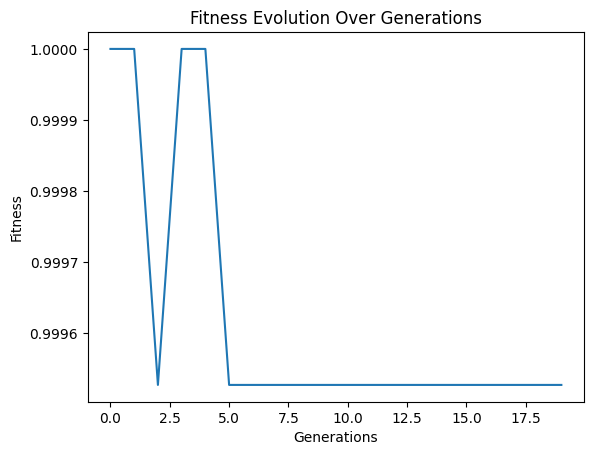

Accuracy with best parameters: 0.9995


In [10]:
import matplotlib.pyplot as plt

# Genetic Algorithm with fitness tracking
def genetic_algorithm_mlp(pop_size, generations, mutation_rate):
    population = initialize_population(pop_size)
    fitness_history = []
    for generation in range(generations):
        fitnesses = [fitness_function_mlp(params) for params in population]
        fitness_history.append(max(fitnesses))
        parents = select_parents(population, fitnesses)
        next_population = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.extend([child1, child2])
        population = next_population
    best_params = max(population, key=fitness_function_mlp)
    return best_params, fitness_history

# Parameters
pop_size = 10
generations = 20
mutation_rate = 0.01

# Run the genetic algorithm to find the best parameters and track fitness
best_params, fitness_history = genetic_algorithm_mlp(pop_size, generations, mutation_rate)
print("Best parameters:", best_params)

# Plot the fitness history
plt.plot(fitness_history)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness Evolution Over Generations')
plt.show()

# Train the final model with the best parameters
num_neurons, learning_rate, alpha = best_params
mlp_best = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=200, alpha=alpha,
                         solver='adam', random_state=42, learning_rate_init=learning_rate)
mlp_best.fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred_best = mlp_best.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best parameters: {accuracy_best:.4f}")

Best parameters: (100, 0.003766740960464017, 0.0036204832827851714)
Generation 1: Best Params: (12, 0.0054669618686146, 0.0036204832827851714), Error: 0.0000
Generation 2: Best Params: (96, 0.002532824029848353, 0.0035869236384281204), Error: 0.0005
Generation 3: Best Params: (100, 0.003766740960464017, 0.0035974767818684286), Error: 0.0005
Generation 4: Best Params: (100, 0.003766740960464017, 0.0036204832827851714), Error: 0.0005
Generation 5: Best Params: (49, 0.003766740960464017, 0.0035974767818684286), Error: 0.0005
Generation 6: Best Params: (100, 0.0010344524017139856, 0.0035974767818684286), Error: 0.0005
Generation 7: Best Params: (100, 0.0010344524017139856, 0.0035974767818684286), Error: 0.0005
Generation 8: Best Params: (100, 0.005109341931538404, 0.0036204832827851714), Error: 0.0000
Generation 9: Best Params: (100, 0.005109341931538404, 0.0035974767818684286), Error: 0.0000
Generation 10: Best Params: (100, 0.005109341931538404, 0.0035974767818684286), Error: 0.0000
Gene

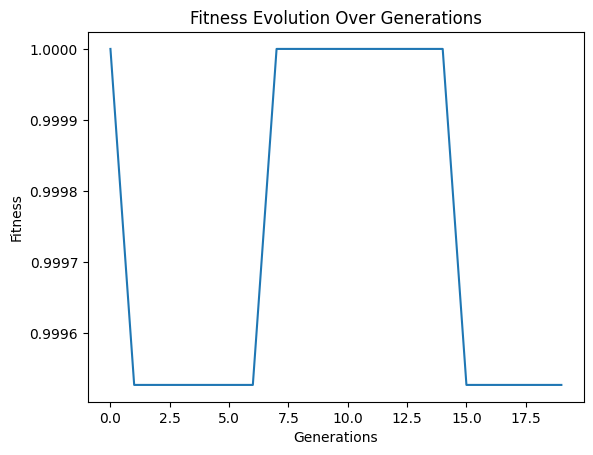

Accuracy with best parameters: 0.9995


In [11]:
# Genetic Algorithm with fitness tracking and best hyperparameters per generation
def genetic_algorithm_mlp(pop_size, generations, mutation_rate):
    population = initialize_population(pop_size)
    fitness_history = []
    best_params_per_generation = []
    for generation in range(generations):
        fitnesses = [fitness_function_mlp(params) for params in population]
        fitness_history.append(max(fitnesses))
        best_params = population[fitnesses.index(max(fitnesses))]
        best_params_per_generation.append((best_params, 1 - max(fitnesses)))  # Error is 1 - accuracy
        parents = select_parents(population, fitnesses)
        next_population = []
        for i in range(0, len(parents), 2):
            parent1, parent2 = parents[i], parents[i + 1]
            child1, child2 = crossover(parent1, parent2)
            child1 = mutate(child1, mutation_rate)
            child2 = mutate(child2, mutation_rate)
            next_population.extend([child1, child2])
        population = next_population
    best_params = max(population, key=fitness_function_mlp)
    return best_params, fitness_history, best_params_per_generation

# Parameters
pop_size = 10
generations = 20
mutation_rate = 0.01

# Run the genetic algorithm to find the best parameters and track fitness
best_params, fitness_history, best_params_per_generation = genetic_algorithm_mlp(pop_size, generations, mutation_rate)
print("Best parameters:", best_params)

# Display the best hyperparameters and their associated error for each generation
for generation, (params, error) in enumerate(best_params_per_generation):
    print(f"Generation {generation + 1}: Best Params: {params}, Error: {error:.4f}")

# Plot the fitness history
plt.plot(fitness_history)
plt.xlabel('Generations')
plt.ylabel('Fitness')
plt.title('Fitness Evolution Over Generations')
plt.show()

# Train the final model with the best parameters
num_neurons, learning_rate, alpha = best_params
mlp_best = MLPClassifier(hidden_layer_sizes=(num_neurons,), max_iter=200, alpha=alpha,
                         solver='adam', random_state=42, learning_rate_init=learning_rate)
mlp_best.fit(x_train.reshape(x_train.shape[0], -1), y_train)
y_pred_best = mlp_best.predict(x_test.reshape(x_test.shape[0], -1))
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Accuracy with best parameters: {accuracy_best:.4f}")

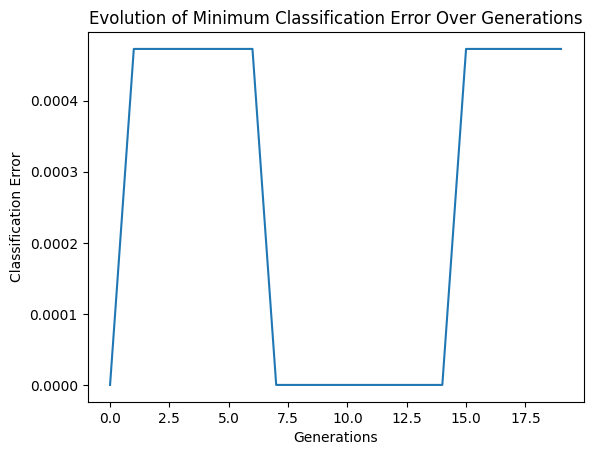

In [12]:
# Extraire les erreurs minimales par génération
errors_per_generation = [error for _, error in best_params_per_generation]

# Tracer l'évolution de l'erreur minimale de classification
plt.plot(errors_per_generation)
plt.xlabel('Generations')
plt.ylabel('Classification Error')
plt.title('Evolution of Minimum Classification Error Over Generations')
plt.show()

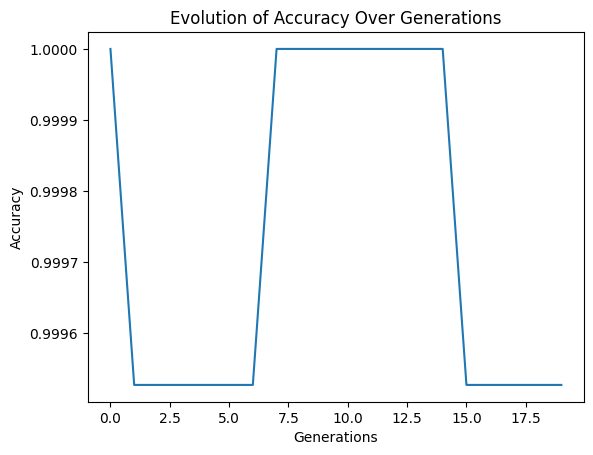

In [13]:
# Tracer l'évolution de la précision au fil des générations
plt.plot(fitness_history)
plt.xlabel('Generations')
plt.ylabel('Accuracy')
plt.title('Evolution of Accuracy Over Generations')
plt.show()

In [14]:
# Précision du MLP seul
accuracy_mlp_seul = accuracy

# Précision du MLP optimisé par AG
accuracy_mlp_optimise = accuracy_best

# Afficher les résultats
print(f"Précision du MLP seul: {accuracy_mlp_seul:.4f}")
print(f"Précision du MLP optimisé par AG: {accuracy_mlp_optimise:.4f}")

# Comparer les résultats
if accuracy_mlp_optimise > accuracy_mlp_seul:
    print("Le MLP optimisé par AG a une meilleure précision que le MLP seul.")
elif accuracy_mlp_optimise < accuracy_mlp_seul:
    print("Le MLP seul a une meilleure précision que le MLP optimisé par AG.")
else:
    print("Les deux modèles ont la même précision.")

Précision du MLP seul: 0.9981
Précision du MLP optimisé par AG: 0.9995
Le MLP optimisé par AG a une meilleure précision que le MLP seul.
